In [1]:
import numpy as np
import numpy.random as npr
from matplotlib import pyplot as plt
#Generate Target Function
targetline=np.array(npr.uniform(-1,1,4)).reshape(2,2)
#Generate Training Set
train=np.array(npr.uniform(-1,1,200)).reshape(100,2)

In [2]:
#Generate output Space
y=np.zeros((100,1))
for i in np.arange(0,100):
    if((train[i,1]-targetline[0,1])-(((targetline[1,1]-targetline[0,1])/(targetline[1,0]-targetline[0,0]))*(train[i,0]-targetline[0,0]))>0):
        y[i]=1
    else:
        y[i]=-1

    

In [3]:
train=np.insert(train,0,1,axis=1)
#Initialise Weights to 0
w=np.zeros((1,3))

In [7]:
#PLA 
itr=0
Ein=0
j=0
while True:
    #Calculate number of misclassified point/Ein
    for c in np.arange(0,100):
        if((np.sign(np.dot(w,train[c])))!=y[c]):
            Ein+=1
            j+=1
    misc=np.zeros((j,1))
    z=0
    #Store Misclassified points
    for x in np.arange(0,100):
        if((np.sign(np.dot(w,train[x])))!=y[x]):
            misc[z]=x
            z+=1
    #Choose a misclassfied point and update Weight vector
    if(j!=0):
        i=npr.randint(0,j)
        r=np.sum(misc[i])
        h=np.sign(np.dot(w,train[int(r)]))
        if(h!=y[int(r)]):
            w+=train[int(r)]*y[int(r)]
    else:
        if(Ein==0):
            break
    Ein=0
    j=0
    itr+=1
        
print(itr)    

24


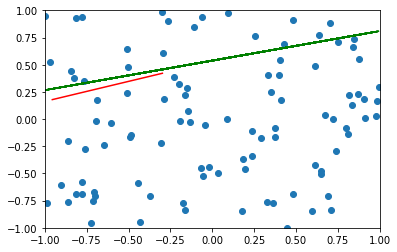

In [8]:
#Plot
fig, ax=plt.subplots()
ax.scatter(*zip(*(np.delete(train,0,axis=1))))
ax.plot(*zip(*targetline), color="red")
ax.plot(train,(-1*w[0,1]/w[0,2])*train+(-1)*w[0,0]/w[0,2],color="green")
ax.axis([-1,1,-1,1])
plt.show()